## ARMIA

In [35]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Load the dataset
data = pd.read_csv('TATASTEEL.NS.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [37]:
# Convert the 'Date' column to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [38]:
#check the null values
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [39]:
# Assuming 'Close' column contains the stock prices
ts_data = data['Close']

In [40]:
# Splitting data into train and test sets
train_data = ts_data[:int(0.8 * len(ts_data))]
test_data = ts_data[int(0.8 * len(ts_data)):]

In [56]:
# Change the order parameter and retrain the model
model = ARIMA(train_data, order=(2, 1, 5))  # Replace p, d, q with values you want to test
fitted_model = model.fit()

In [57]:
# Forecast
forecast = fitted_model.forecast(steps=len(test_data))

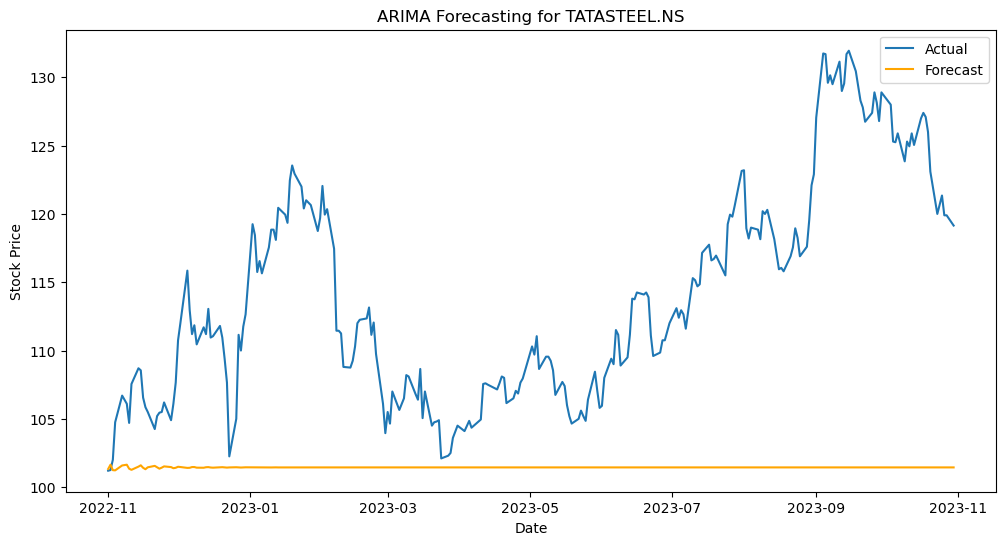

In [58]:
# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecasting for TATASTEEL.NS')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()